### Biblioteki, stałe i ładowanie danych

In [1]:
import glob
import json
from itertools import chain

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [2]:
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('./data/features.csv')

### Wstępna eksploracja

In [4]:
df.head()

,track_id,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artists_ids,genres
0,0aQA9DP54h37OevE7hRc2a,NaN,0.653,0.796,7,-4.050,0,0.2450,0.2400,0.00000,0.1080,0.405,160.026,252712,4,"[""6fOMl44jA4Sp5b9PpYCkzz""]","[[""hip hop"", ""pop rap"", ""rap""]]"
1,4ixBAI0E1M6df9mP27etZK,NaN,0.731,0.494,4,-9.567,1,0.0467,0.2010,0.00000,0.1600,0.477,120.045,228056,4,"[""46VwdSiSccsgzNhJP9sGhQ"", ""2272CVpxVafY3L0UHu...","[[""icelandic hip hop"", ""icelandic pop""]]"
2,3jO5IAvslWxaTxswokg66i,NaN,0.859,0.464,3,-7.328,1,0.2890,0.2080,0.00000,0.1140,0.370,134.966,195453,4,"[""2LRoIwlKmHjgvigdNGBHNo"", ""5J7rXWjtn5HzUkJ4Je...","[[""colombian pop"", ""latin"", ""pop reggaeton"", ""..."
3,5iS3TEmmRcDJU2pTJQ98zB,NaN,0.482,0.617,10,-10.288,0,0.0869,0.7750,0.58300,0.1070,0.350,174.040,300861,4,"[""3MaQwUQBigrjcMYHk8bDKm"", ""5Y24oYaTX3VOvtAcG2...","[[""finnish dance pop"", ""finnish hip hop"", ""fin..."
4,29xPIFa0othUcFrEGyJCZu,NaN,0.824,0.684,1,-7.185,1,0.4070,0.0236,0.00853,0.0762,0.509,141.143,186973,4,"[""2s7fZ34RK8RUJQ2ewsh6I5"", ""3tTvSeZiFDP3CY5EdP...","[[""francoton"", ""french hip hop"", ""pop urbaine""..."


Każdemu utworowi może być przypisanych wiele gatunków. Z powodu braku jasnej przesłanki co do wyboru tylko 1 z wielu, należy wziąć pod uwagę wszystkie gatunki naraz.

In [5]:
def transform_row(x):
    l = json.loads(x)
    if len(l) >= 1:
        l_new = []
        for sublist in l:
            l_new.extend(sublist)
        return l_new
    else:
        return []
    
df['genres'] = df['genres'].apply(lambda x: transform_row(x))

In [6]:
df['genres']

0                                  [hip hop, pop rap, rap]
1                       [icelandic hip hop, icelandic pop]
2        [colombian pop, latin, pop reggaeton, reggaeto...
3        [finnish dance pop, finnish hip hop, finnish p...
4        [francoton, french hip hop, pop urbaine, rap c...
                               ...                        
54770          [french hip hop, pop urbaine, rap francais]
54771                [latin, latin alternative, latin pop]
54772    [albanian hip hop, deep german hip hop, german...
54773    [dutch hip hop, dutch pop, dutch rap pop, dutc...
54774                                                   []
Name: genres, Length: 54775, dtype: object

In [7]:
df['genres'] = df['genres'].apply(lambda x: ['_'.join(genre.split(' ')) for genre in x])

In [8]:
df['genres']

0                                  [hip_hop, pop_rap, rap]
1                       [icelandic_hip_hop, icelandic_pop]
2        [colombian_pop, latin, pop_reggaeton, reggaeto...
3        [finnish_dance_pop, finnish_hip_hop, finnish_p...
4        [francoton, french_hip_hop, pop_urbaine, rap_c...
                               ...                        
54770          [french_hip_hop, pop_urbaine, rap_francais]
54771                [latin, latin_alternative, latin_pop]
54772    [albanian_hip_hop, deep_german_hip_hop, german...
54773    [dutch_hip_hop, dutch_pop, dutch_rap_pop, dutc...
54774                                                   []
Name: genres, Length: 54775, dtype: object

In [9]:
genres_all = []
for row in df['genres']:
    genres_all.extend(row)
    
genres_counts = {}
for genre_occur in genres_all:
    genres_counts.setdefault(genre_occur, 0)
    genres_counts[genre_occur] += 1

In [10]:
genres_counts

{'hip_hop': 3293,
 'pop_rap': 3290,
 'rap': 4996,
 'icelandic_hip_hop': 1000,
 'icelandic_pop': 1324,
 'colombian_pop': 864,
 'latin': 5754,
 'pop_reggaeton': 188,
 'reggaeton': 4955,
 'reggaeton_colombiano': 1054,
 'trap_latino': 6395,
 'trap_boricua': 337,
 'finnish_dance_pop': 2769,
 'finnish_hip_hop': 2160,
 'finnish_pop': 2599,
 'finnish_indie': 124,
 'francoton': 3211,
 'french_hip_hop': 5312,
 'pop_urbaine': 5253,
 'rap_conscient': 1421,
 'rap_francais': 3289,
 'drill_francais': 271,
 'rap_lyonnais': 23,
 'uk_hip_hop': 1220,
 'atl_hip_hop': 1356,
 'southern_hip_hop': 1460,
 'trap': 3532,
 'canadian_pop': 668,
 'pop': 6392,
 'desi_hip_hop': 490,
 'desi_pop': 1504,
 'filmi': 849,
 'modern_bollywood': 1120,
 'italian_indie_pop': 919,
 'rome_indie': 370,
 'bulgarian_pop': 819,
 'finnish_trap': 276,
 'philly_rap': 185,
 'cali_rap': 151,
 'gangster_rap': 597,
 'g_funk': 50,
 'west_coast_rap': 114,
 'cantautor': 146,
 'spanish_indie_pop': 48,
 'spanish_rock': 77,
 'iskelma': 858,
 'rap

In [16]:
wordcloud = WordCloud(width=1000, height=1000, random_state=7, 
                      background_color='white', max_words=150).generate_from_frequencies(genres_counts)

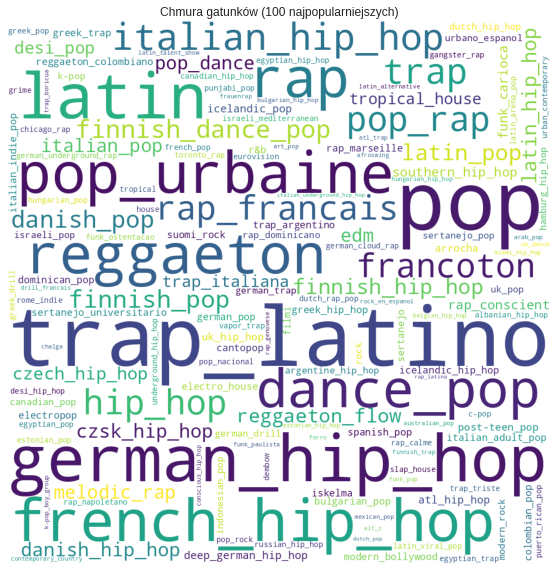

In [17]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.title('Chmura gatunków (100 najpopularniejszych)')
plt.axis('off')
plt.show()

Najpopularniejszymi gatunkami są pop, trap, hip hop, latin, reggaeton. Dla każdego z nich istnieje wiele podgatunków. W celu łatwieszej dalszej analizy należy uogólnić nazwy gatunków (na podstawie słów kluczowych).

### Transformacja nazw gatunków

In [13]:
# TODO